In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [2]:
!wget http://www.timeseriesclassification.com/Downloads/ECG5000.zip
!unzip ECG5000.zip

--2021-11-23 18:28:39--  http://www.timeseriesclassification.com/Downloads/ECG5000.zip
Resolving www.timeseriesclassification.com (www.timeseriesclassification.com)... 109.123.71.232
Connecting to www.timeseriesclassification.com (www.timeseriesclassification.com)|109.123.71.232|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10614407 (10M) [application/zip]
Saving to: ‘ECG5000.zip’

ECG5000.zip         100%[===================>]  10.12M  7.42MB/s    in 1.4s    

2021-11-23 18:28:41 (7.42 MB/s) - ‘ECG5000.zip’ saved [10614407/10614407]

Archive:  ECG5000.zip
  inflating: ECG5000.txt             
  inflating: ECG5000_TEST.arff       
  inflating: ECG5000_TEST.txt        
  inflating: ECG5000_TRAIN.arff      
  inflating: ECG5000_TRAIN.txt       
  inflating: ECG5000_TEST.ts         
  inflating: ECG5000_TRAIN.ts        


In [3]:
!ls -alrt

total 36800
-rw-r--r-- 1 root root 10614407 Aug  9  2019 ECG5000.zip
-rw-r--r-- 1 root root       38 Aug  9  2019 ECG5000.txt
-rw-r--r-- 1 root root  7086857 Aug  9  2019 ECG5000_TEST.arff
-rw-r--r-- 1 root root  1128500 Aug  9  2019 ECG5000_TRAIN.txt
-rw-r--r-- 1 root root   790229 Aug  9  2019 ECG5000_TRAIN.arff
-rw-r--r-- 1 root root 10156500 Aug  9  2019 ECG5000_TEST.txt
-rw-r--r-- 1 root root  7083409 Aug  9  2019 ECG5000_TEST.ts
-rw-r--r-- 1 root root   786781 Aug  9  2019 ECG5000_TRAIN.ts
drwxr-xr-x 4 root root     4096 Nov 18 14:35 .config
drwxr-xr-x 1 root root     4096 Nov 18 14:36 sample_data
drwxr-xr-x 1 root root     4096 Nov 23 18:26 ..
drwxr-xr-x 1 root root     4096 Nov 23 18:28 .


Concatenating train and test data

In [4]:
!cat ECG5000_TRAIN.txt ECG5000_TEST.txt > ecg_final.txt

In [5]:
!head ecg_final.txt

   1.0000000e+00  -1.1252183e-01  -2.8272038e+00  -3.7738969e+00  -4.3497511e+00  -4.3760410e+00  -3.4749863e+00  -2.1814082e+00  -1.8182865e+00  -1.2505219e+00  -4.7749208e-01  -3.6380791e-01  -4.9195659e-01  -4.2185509e-01  -3.0920086e-01  -4.9593870e-01  -3.4211867e-01  -3.5533627e-01  -3.6791303e-01  -3.1650279e-01  -4.1237405e-01  -4.7167181e-01  -4.1345783e-01  -3.6461703e-01  -4.4929829e-01  -4.7141866e-01  -4.2477658e-01  -4.6251673e-01  -5.5247236e-01  -4.7537519e-01  -6.9420000e-01  -7.0186810e-01  -5.9381178e-01  -6.6068415e-01  -7.1383066e-01  -7.6980688e-01  -6.7228161e-01  -6.5367605e-01  -6.3940562e-01  -5.5930228e-01  -5.9167032e-01  -4.9322332e-01  -4.6305183e-01  -3.0164382e-01  -2.3273401e-01  -1.2505488e-01  -1.5394314e-01  -2.4357404e-02  -6.5608758e-02   3.4999258e-02   6.1935219e-02   7.1195420e-02   1.2392505e-01   1.0312371e-01   2.2522849e-01   1.2868305e-01   3.0248315e-01   2.5727621e-01   1.9635161e-01   1.7938297e-01   2.4472863e-01   3.4121687e-01   3.282

The data in text file is messy with uneven and trailing spaces and it is  difficult to read the text file with pandas read_csv and create a dataframe, so lets clean the trailing white spaces and tidy our data before we create a dataframe.

In [6]:
removed_spaces = []
with open("/content/ecg_final.txt") as f1:
  lines = f1.readlines()
  for line in lines:
    line = line.split()
    removed_spaces.append((" ").join(line))

In [7]:
with open('ecg_cleaned.txt', 'w') as f2:
    for line in removed_spaces:
        f2.write(line)
        f2.write('\n')

In [8]:
df = pd.read_csv("ecg_cleaned.txt", sep=" ", header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
0,1.0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,-0.477492,-0.363808,-0.491957,-0.421855,-0.309201,-0.495939,-0.342119,-0.355336,-0.367913,-0.316503,-0.412374,-0.471672,-0.413458,-0.364617,-0.449298,-0.471419,-0.424777,-0.462517,-0.552472,-0.475375,-0.694200,-0.701868,-0.593812,-0.660684,-0.713831,-0.769807,-0.672282,-0.653676,-0.639406,-0.559302,...,1.173345,1.258179,1.433789,1.700533,1.999043,2.125341,1.993291,1.932246,1.797437,1.522284,1.251168,0.998730,0.483722,0.023132,-0.194914,-0.220917,-0.243737,-0.254695,-0.291136,-0.256490,-0.227874,-0.322423,-0.289286,-0.318170,-0.363654,-0.393456,-0.266419,-0.256823,-0.288694,-0.162338,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,1.0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,0.148951,0.183527,0.294876,0.190233,0.235575,0.253487,0.221742,0.050233,0.178042,0.139563,0.046794,0.043007,0.106544,0.012654,0.003995,0.045724,-0.045999,-0.072667,-0.071078,-0.153866,-0.227254,-0.249270,-0.253489,-0.332835,-0.264330,-0.345825,-0.310781,-0.334160,-0.306178,...,1.557410,1.808428,2.164346,2.070747,1.903614,1.764455,1.507769,1.293428,0.894562,0.578016,0.244343,-0.286443,-0.515881,-0.732707,-0.832465,-0.803318,-0.836252,-0.777865,-0.774753,-0.733404,-0.721386,-0.832095,-0.711982,-0.751867,-0.757720,-0.853120,-0.766988,-0.688161,-0.519923,0.039406,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,1.0,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,-0.394229,-0.282897,-0.356926,-0.287297,-0.399489,-0.473244,-0.379048,-0.399039,-0.178594,-0.339522,-0.498447,-0.337251,-0.425480,-0.423952,-0.463170,-0.493253,-0.549749,-0.529831,-0.530935,-0.502365,-0.417368,-0.526346,-0.471005,-0.676784,-0.898612,-0.610571,-0.530164,-0.765674,-0.581937,-0.537848,...,1.640105,1.810988,2.185398,2.262985,2.052920,1.890488,1.793033,1.564784,1.234619,0.900302,0.551957,0.258222,-0.128587,-0.092585,-0.168606,-0.495989,-0.395034,-0.328238,-0.448138,-0.268230,-0.456415,-0.357867,-0.317508,-0.434112,-0.549203,-0.324615,-0.268082,-0.220384,-0.117429,0.614059,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,1.0,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,-0.183319,-0.101657,-0.273874,-0.127818,-0.195983,-0.213523,-0.176473,-0.156932,-0.149172,-0.181510,-0.180074,-0.246151,-0.274260,-0.140960,-0.277449,-0.382549,-0.311937,-0.360093,-0.405968,-0.571433,-0.524106,-0.537886,-0.606778,-0.661446,-0.683375,-0.746683,-0.635662,-0.625231,-0.540094,...,1.553079,1.772155,2.000769,1.925003,1.898426,1.720953,1.501711,1.422492,1.023225,0.776341,0.504426,0.056382,-0.233161,-0.406388,-0.327528,-0.460868,-0.402536,-0.345752,-0.354206,-0.439959,-0.425326,-0.439789,-0.451835,-0.395926,-0.448762,-0.391789,-0.376307,-0.461069,-0.253524,0.213006,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,1.0,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,-0.298107,-0.428928,-0.491351,-0.361304,-0.339296,-0.324952,-0.290113,-0.363051,-0.525684,-0.597423,-0.575523,-0.567503,-0.504555,-0.618406,-0.682814,-0.743849,-0.815588,-0.826902,-0.782374,-0.929462,-0.999672,-1.060969,-1.007877,-1.028735,-1.122629,-1.028650,-1.046515,-1.063372,-1.122423,...,0.982230,1.155363,1.336254,1.627534,1.717594,1.696487,1.741686,1.674078,1.546928,1.331738,1.110168,0.922210,0.521777,0.154852,-0.123861,-0.202998,-0.247956,-0.219122,-0.214695,-0.319215,-0.198597,-0.151618,-0.129593,-0.074939,-0.1

In [9]:
df.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            131, 132, 133, 134, 135, 136, 137, 138, 139, 140],
           dtype='int64', length=141)

In [10]:
df = df.add_prefix("c")

In [11]:
df["c0"].value_counts()

1.0    2919
2.0    1767
4.0     194
3.0      96
5.0      24
Name: c0, dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
c0,5000.0,1.527400,0.760372,1.000000,1.000000,1.000000,2.000000,5.000000
c1,5000.0,-0.262476,1.152369,-6.729499,-1.004511,-0.297541,0.500061,4.966414
c2,5000.0,-1.649511,1.445493,-7.090374,-2.701576,-1.661892,-0.677290,3.479689
c3,5000.0,-2.492211,1.386409,-5.132459,-3.668096,-2.585677,-1.513964,2.660597
c4,5000.0,-3.119443,1.302802,-5.363241,-4.227247,-3.387934,-2.235369,1.899798
...,...,...,...,...,...,...,...,...
c136,5000.0,-0.761043,2.086218,-5.150100,-3.030509,-0.030767,1.034584,3.351437
c137,5000.0,-0.834741,2.056220,-4.880460,-2.868331,-0.195151,0.945237,3.432518
c138,5000.0,-0.642263,1.859296,-5.496107,-2.153513,-0.194423,0.951681,3.579448
c139,5000.0,-0.487242,1.830987,-5.880890,-1.657771,-0.160262,1.002692,4.425976


Checking for Null values

In [13]:
check_null = df.isnull().sum()
check_null[check_null != 0]

Series([], dtype: int64)

In [14]:
train_data, test_data, train_labels, test_labels = train_test_split(df.values, df.values[:,0:1], test_size=0.2, random_state=111)

We have included target column in train_data and test_data, because we want to seperate the normal and anomaly data.
We will drop the target column while training anyways. Since we are building a neural network we also scale our data usin MinMaxScaler

In [15]:
scaler = MinMaxScaler()
data_scaled = scaler.fit(train_data)

In [16]:
train_data_scaled = data_scaled.transform(train_data)
test_data_scaled = data_scaled.transform(test_data)

In [17]:
train_data_scaled

array([[0.        , 0.50002524, 0.42299659, ..., 0.61680162, 0.58388556,
        0.3649298 ],
       [0.        , 0.48602565, 0.31200637, ..., 0.60438613, 0.6676527 ,
        0.40538671],
       [0.        , 0.6760041 , 0.6161329 , ..., 0.73484988, 0.64562905,
        0.43438114],
       ...,
       [0.25      , 0.70698484, 0.7982501 , ..., 0.23053824, 0.31421167,
        0.37774737],
       [0.        , 0.46498254, 0.25827775, ..., 0.6340938 , 0.66453824,
        0.47717869],
       [0.25      , 0.69314707, 0.79831145, ..., 0.68561341, 0.61110713,
        0.53512758]])

In [18]:
normal_train_data = pd.DataFrame(train_data_scaled).add_prefix("c").query("c0 == 0").values[:,1:]
anomaly_train_data = pd.DataFrame(train_data_scaled).add_prefix("c").query("c0 > 0").values[:,1:]

In [19]:
normal_test_data = pd.DataFrame(test_data_scaled).add_prefix("c").query("c0 == 0").values[:,1:]
anomaly_test_data = pd.DataFrame(test_data_scaled).add_prefix("c").query("c0 > 0").values[:,1:]

In [20]:
print(normal_train_data.shape)
print(normal_test_data.shape)

(2356, 140)
(563, 140)


In [21]:
print(anomaly_train_data.shape)
print(anomaly_test_data.shape)

(1644, 140)
(437, 140)


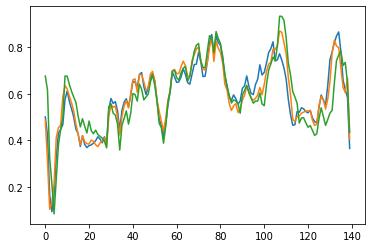

In [22]:
plt.plot(normal_train_data[0])
plt.plot(normal_train_data[1])
plt.plot(normal_train_data[2])

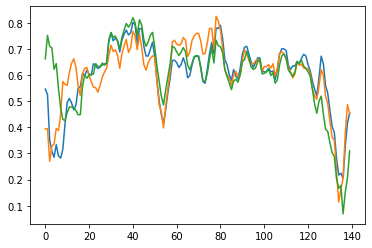

In [23]:
plt.plot(anomaly_train_data[0])
plt.plot(anomaly_train_data[1])
plt.plot(anomaly_train_data[2])

In [24]:
class AutoEncoder(Model):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = tf.keras.Sequential([
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(8, activation="relu")])
    
    self.decoder = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(140, activation="sigmoid")])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [25]:
model = AutoEncoder()

In [26]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode="min")
model.compile(optimizer='adam', loss='mae')

In [27]:
history = model.fit(normal_train_data, normal_train_data,
                    epochs = 50,
                    batch_size=128,
                    validation_data=(train_data_scaled[:,1:], train_data_scaled[:,1:]),
                    shuffle=True,
                    callbacks=[early_stopping])

Epoch 1/50
19/19 [==============================] - 1s 17ms/step - loss: 0.1236 - val_loss: 0.1024
Epoch 2/50
19/19 [==============================] - 0s 9ms/step - loss: 0.0670 - val_loss: 0.0796
Epoch 3/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0502 - val_loss: 0.0765
Epoch 4/50
19/19 [==============================] - 0s 9ms/step - loss: 0.0481 - val_loss: 0.0748
Epoch 5/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0476 - val_loss: 0.0746
Epoch 6/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0473 - val_loss: 0.0736
Epoch 7/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0470 - val_loss: 0.0733
Epoch 8/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0465 - val_loss: 0.0730
Epoch 9/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0460 - val_loss: 0.0714
Epoch 10/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0443 - val_loss: 0.0703
Epoch 11/50
19/19 

In [28]:
encoder_out = model.encoder(normal_test_data).numpy()

In [29]:
encoder_out.shape

(563, 8)

In [30]:
decoder_out = model.decoder(encoder_out).numpy()

In [31]:
decoder_out.shape

(563, 140)

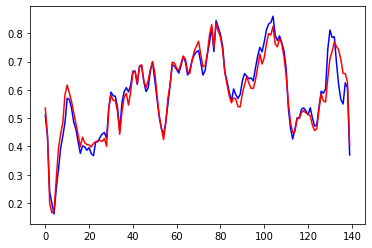

In [32]:
plt.plot(normal_test_data[0], "b")
plt.plot(decoder_out[0], "r")

In [33]:
encoder_out_a = model.encoder(anomaly_test_data).numpy()
decoder_out_a = model.decoder(encoder_out_a).numpy()

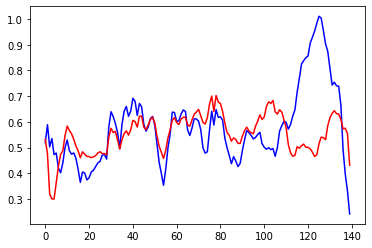

In [34]:
plt.plot(anomaly_test_data[0], "b")
plt.plot(decoder_out_a[0], "r")

Reconstruction error is high for anomaly data when compared to normal

In [35]:
reconstructions = model.predict(normal_test_data)
test_loss = tf.keras.losses.mae(reconstructions, normal_test_data)

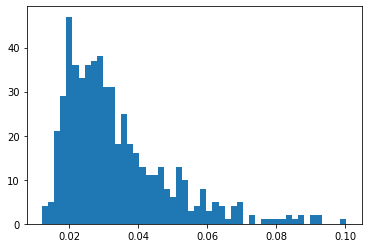

In [36]:
plt.hist(test_loss, bins=50)
plt.show()

In [37]:
np.mean(test_loss)

0.03366581682602338

In [38]:
np.std(test_loss)

0.015198880045241288

In [39]:
threshold = np.mean(test_loss) + 2*np.std(test_loss)
threshold

0.06406357691650597

In [40]:
reconstructions = model.predict(anomaly_test_data)
test_loss_a = tf.keras.losses.mae(reconstructions, anomaly_test_data)

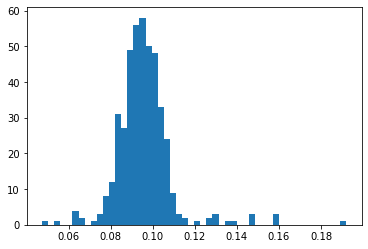

In [41]:
plt.hist(test_loss_a, bins=50)
plt.show()

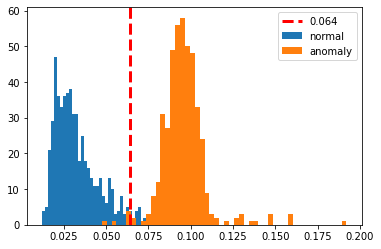

In [42]:
plt.hist(test_loss, bins=50, label = "normal")
plt.hist(test_loss_a, bins=50, label = "anomaly")
plt.axvline(threshold, color="r", linewidth=3, linestyle="dashed", label = '{:0.3f}'.format(threshold))
plt.legend(loc="upper right")
plt.show()

The threshold can be set on basis of wether we want to detect normal or abnormal.

In [43]:
np.mean(test_loss_a)

0.09563556337455828

In [44]:
np.std(test_loss_a)

0.013101733558575841

In [45]:
tf.math.less(test_loss, threshold)

<tf.Tensor: shape=(563,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  Tr

In [46]:
preds = tf.math.less(test_loss, threshold)

In [47]:
tf.math.count_nonzero(preds)

<tf.Tensor: shape=(), dtype=int64, numpy=535>

In [48]:
preds.shape

TensorShape([563])

Out of 563 the model classified 532 correctly as normal.

In [49]:
preds_a = tf.math.greater(test_loss_a, threshold)

In [50]:
tf.math.count_nonzero(preds_a)

<tf.Tensor: shape=(), dtype=int64, numpy=434>

In [51]:
preds_a.shape

TensorShape([437])

Out of 437 anomaly model has correctly predicted 435.